In [22]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Gantilah 'nama_file.csv' dengan nama file dataset yang ingin Anda baca
df = pd.read_csv('/content/sample_data/diamonds.csv')

# Untuk melihat beberapa baris pertama dari DataFrame
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [26]:
# Menghitung jumlah nilai unik untuk masing-masing kolom
unique_counts = df.nunique()

# Menampilkan jumlah nilai unik untuk setiap kolom
print(unique_counts)


Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64


In [27]:
# Kategori-kategori fitur
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']
target = 'price'

# Membuat DataFrame baru untuk masing-masing kategori
df_numerical = df[numerical_features]
df_categorical = df[categorical_features]
df_target = df[target]

# Menampilkan beberapa baris pertama dari setiap DataFrame
print("Numerical Features:")
print(df_numerical.head())

print("\nCategorical Features:")
print(df_categorical.head())

print("\nTarget:")
print(df_target.head())


Numerical Features:
   carat  depth  table     x     y     z
0   0.23   61.5   55.0  3.95  3.98  2.43
1   0.21   59.8   61.0  3.89  3.84  2.31
2   0.23   56.9   65.0  4.05  4.07  2.31
3   0.29   62.4   58.0  4.20  4.23  2.63
4   0.31   63.3   58.0  4.34  4.35  2.75

Categorical Features:
       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2

Target:
0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


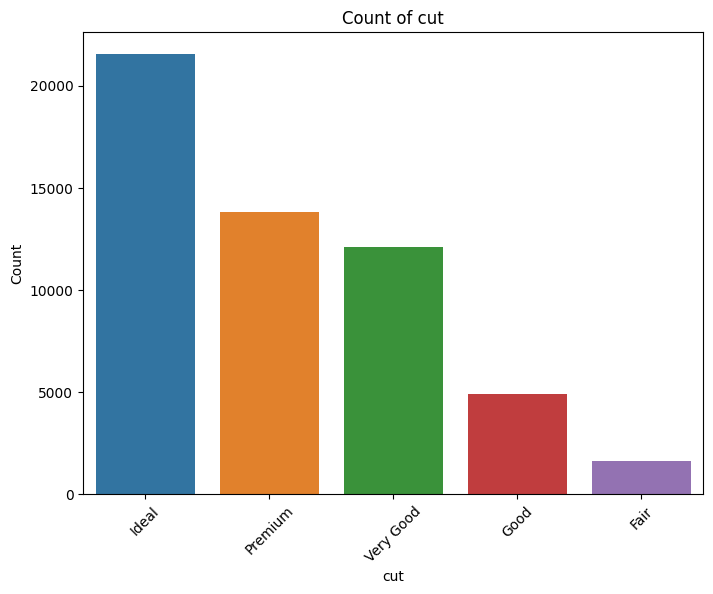

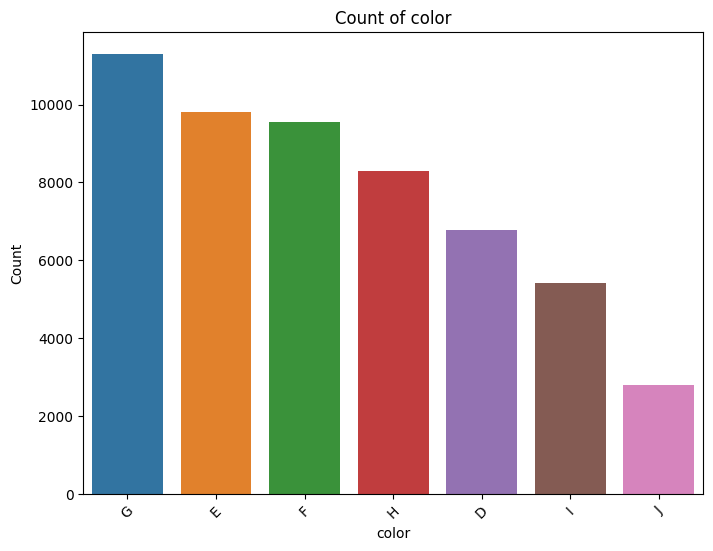

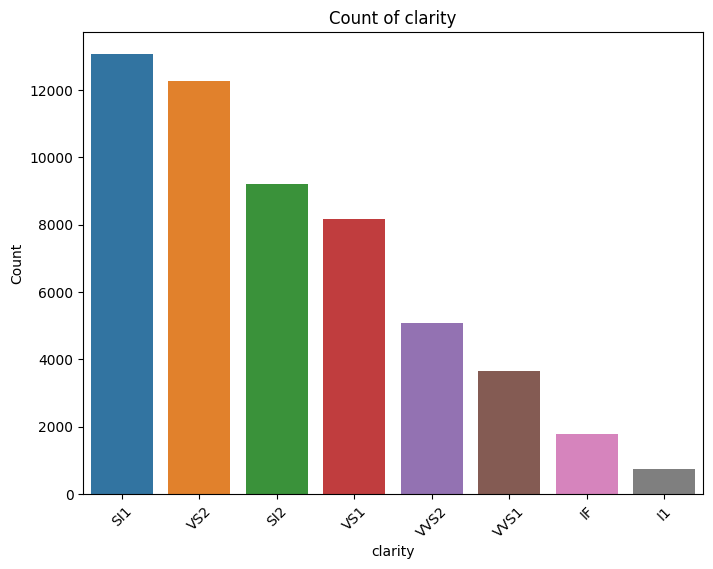

In [28]:
# Nama fitur kategorikal
categorical_features = ['cut', 'color', 'clarity']

# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 6))  # Ukuran grafik
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Untuk mengatur rotasi label
    plt.show()


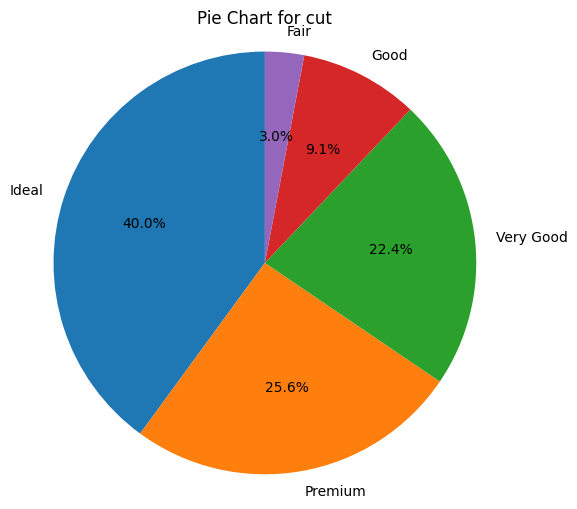

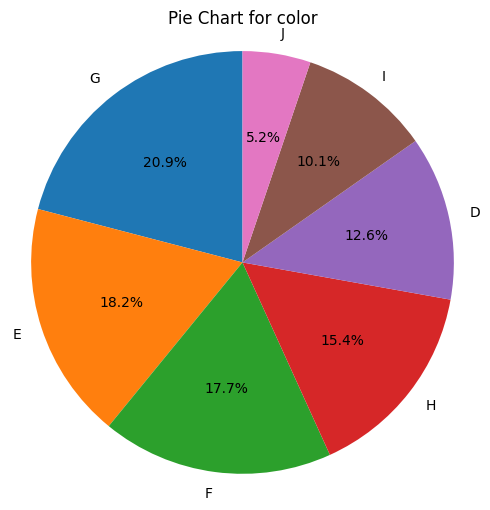

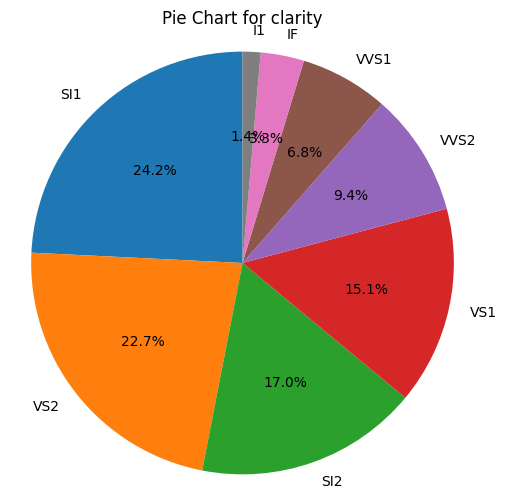

In [29]:
# Nama fitur kategorikal
categorical_features = ['cut', 'color', 'clarity']

# Membuat pie chart untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(6, 6))  # Ukuran grafik
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {feature}')
    plt.axis('equal')  # Membuat lingkaran menjadi lingkaran sejati
    plt.show()


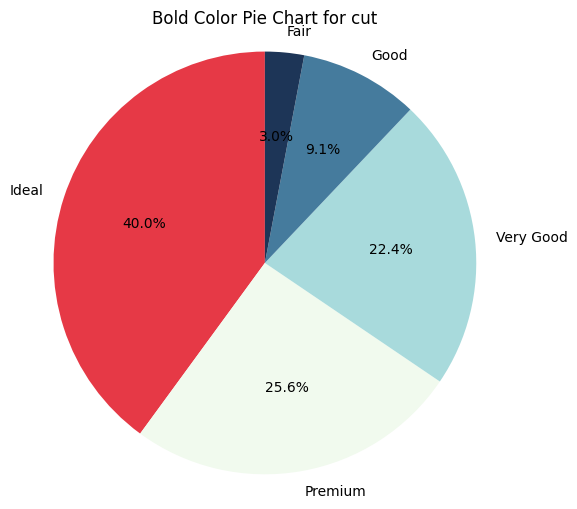

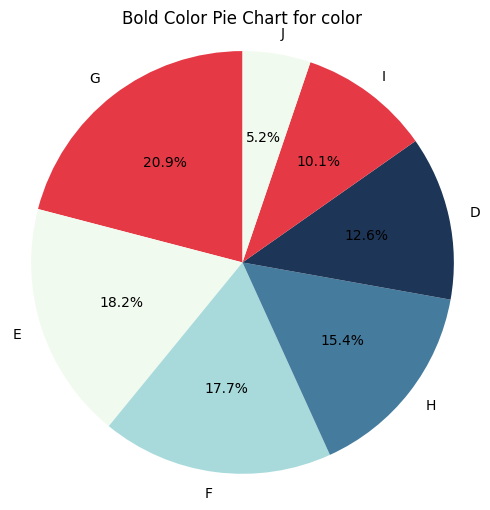

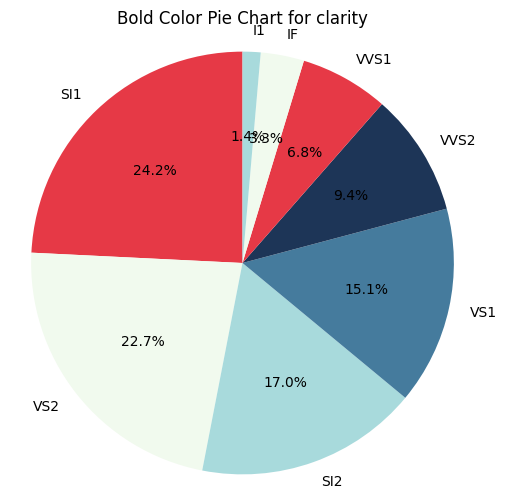

In [30]:


# Nama fitur kategorikal
categorical_features = ['cut', 'color', 'clarity']

# Palet warna bold
bold_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']

# Membuat pie chart untuk setiap fitur kategorikal dengan palet warna bold
for feature in categorical_features:
    plt.figure(figsize=(6, 6))  # Ukuran grafik
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, colors=bold_colors)
    plt.title(f'Bold Color Pie Chart for {feature}')
    plt.axis('equal')  # Membuat lingkaran menjadi lingkaran sejati
    plt.show()


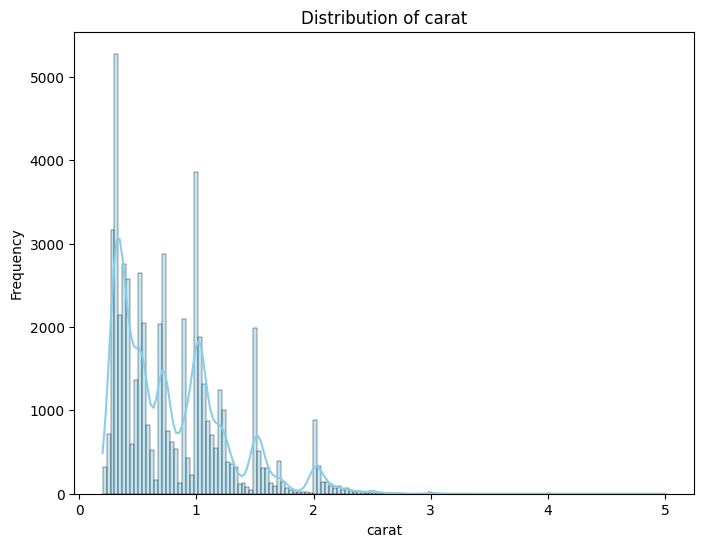

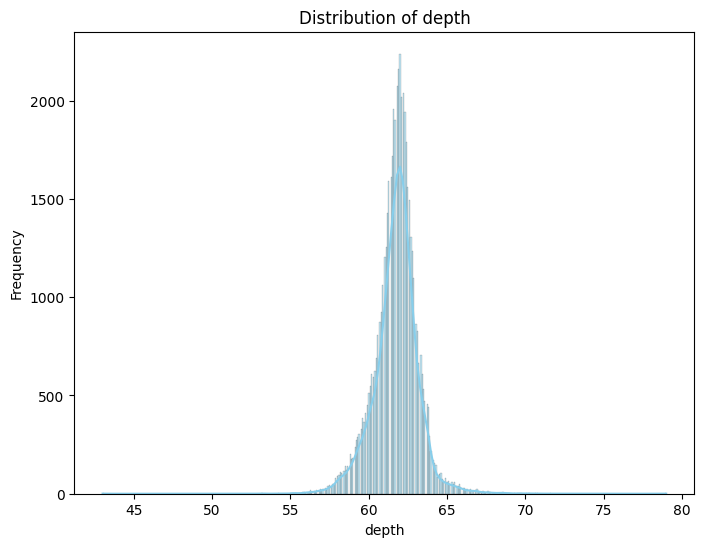

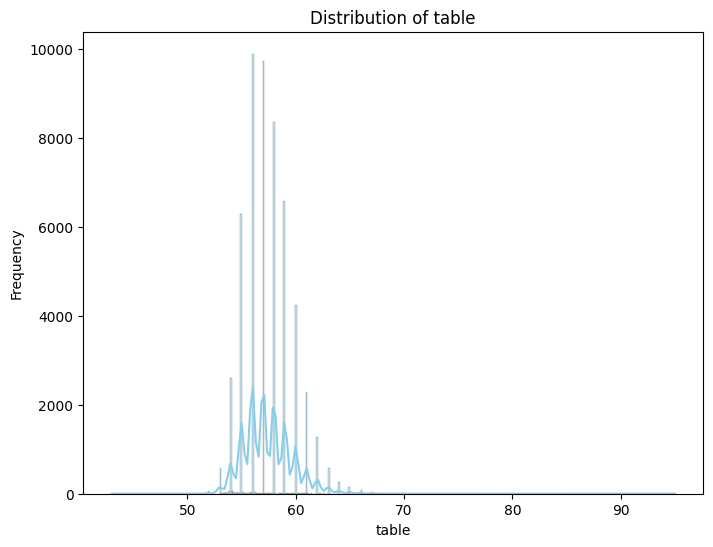

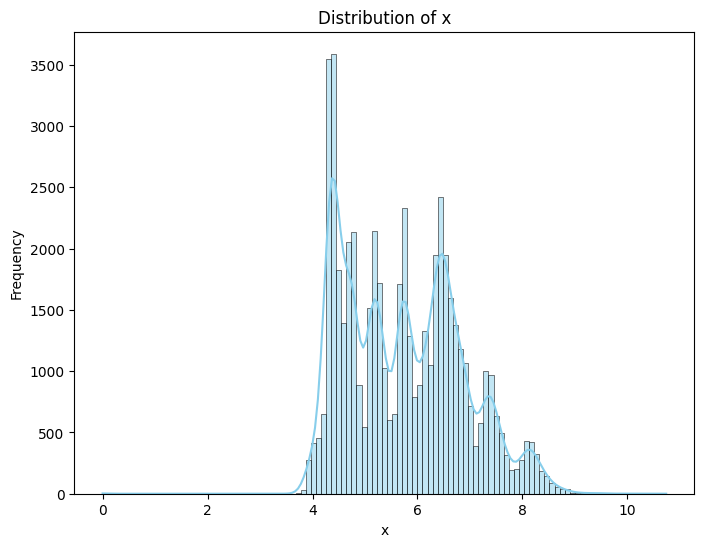

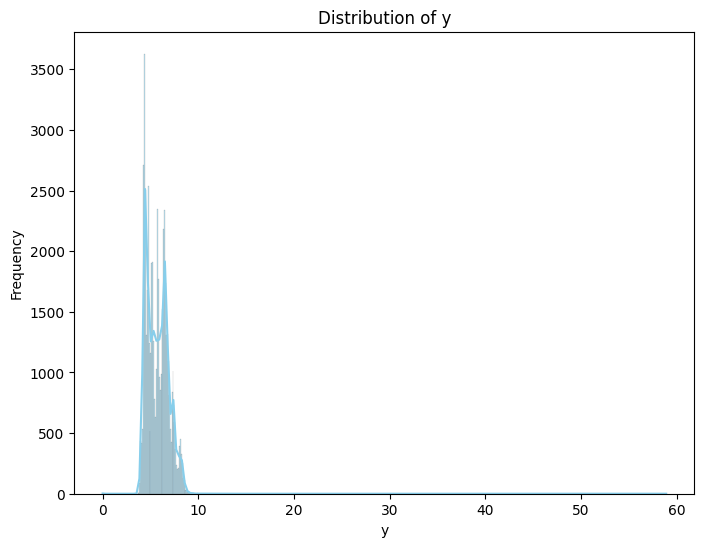

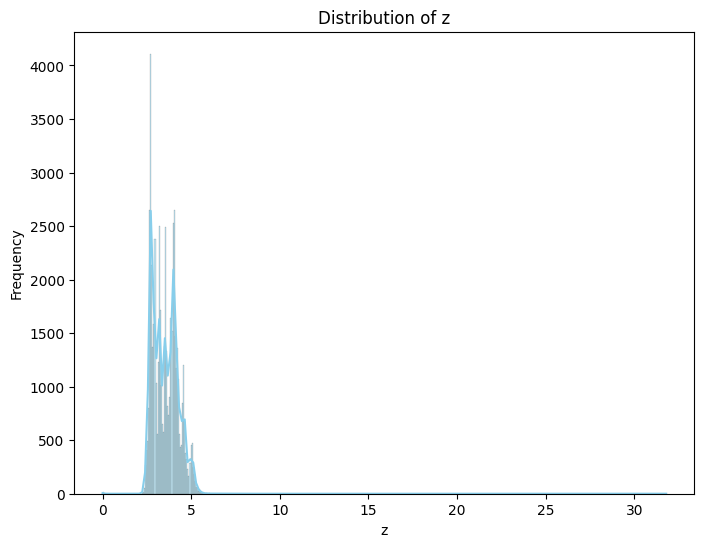

In [31]:
# Nama numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Memvisualisasikan distribusi untuk setiap numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Ukuran grafik
    sns.histplot(df[feature], kde=True, color='skyblue')  # Menggunakan histogram dan KDE
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

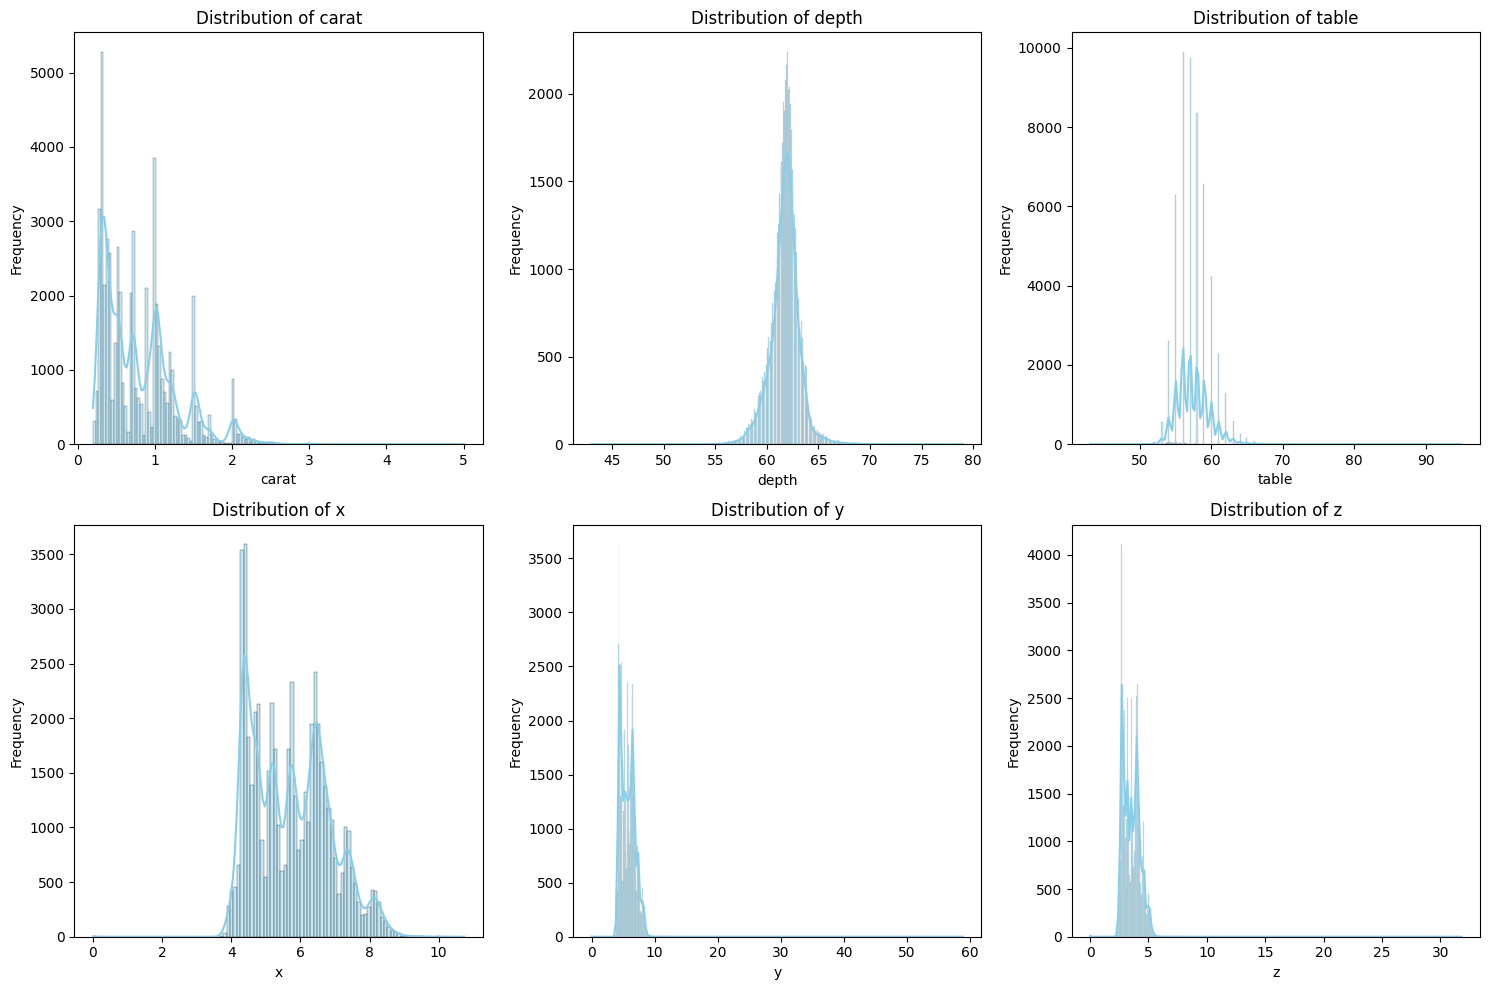

In [32]:
# Nama numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Mengatur subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 baris, 3 kolom

# Memvisualisasikan distribusi untuk setiap numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

In [35]:
# Memvisualisasikan distribusi dengan histogram interaktif
for feature in numerical_features:
    fig = px.histogram(
        df,
        x=feature,
        title=f'Distribution of {feature}',
        labels={feature: feature},
    )

    fig.update_traces(marker_color='skyblue', selector=dict(type='histogram'))

    # Tambahkan kontrol bin width
    fig.update_xaxes(type="category")

    fig.show()

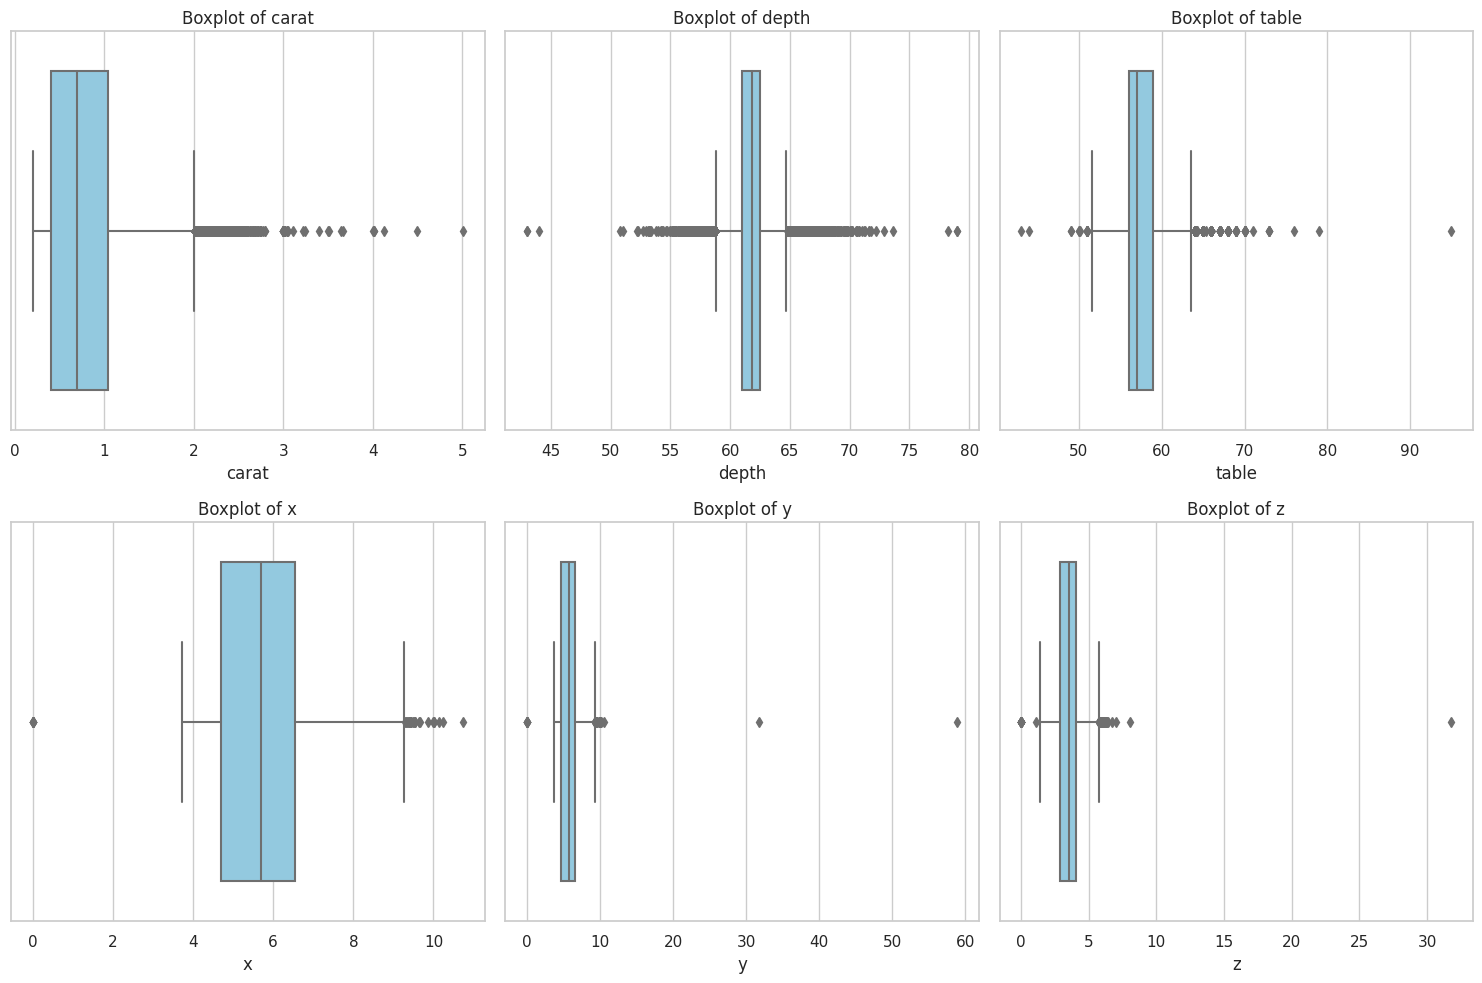

In [40]:
# Nama numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Mengatur subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

# Memvisualisasikan boxplot untuk setiap numerical feature dengan orientasi horizontal
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x=feature, ax=axes[row, col], orient='h', color='skyblue')
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()